# Plotting of Evaluation Results: Decision Times

Compare number of decisions and time for decisions between different algorithms.
Take decisions per flow, node, and in total into account.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display

network = 'dfn_58.graphml'
result_dir = 'decision_results_dfn'
runs = [i for i in range(60, 110)]
# network = 'gts_ce_149.graphml'
# result_dir = 'decision_results_gts'
# runs = [i for i in range(50, 100)]

config = 'hc'   # heterogeneous capacity
ing = '0.3'
algos = ['gpasp', 'spr2', 'bjointsp', 'bjointsp_recalc']
labels = ['GCASP', 'SBC', 'BSP', 'BSP+']
# algos = ['gpasp']
# labels = ['GCASP']

sns.set(font_scale=1.1, style='white')

In [2]:
df = None
for run in runs:
    for i, algo in enumerate(algos):
        # check if run completed successfully (contains metric results after t=1000); else skip
        df_metrics = pd.read_csv(f'{result_dir}/{run}/{config}/{network}/{ing}/{algo}/metrics.csv')
        if df_metrics['time'].values[-1] != 1000:
            print(f'Run {result_dir}/{run}/{config}/{network}/{ing}/{algo} did not complete successfully. Skipping...')
            continue
        
        # read decision results
        df_tmp = pd.read_csv(f'{result_dir}/{run}/{config}/{network}/{ing}/{algo}/agg_decisions.csv')
        df_tmp['run'] = run
        df_tmp['algorithm'] = labels[i]
        # create df for first algo
        if df is None:
            df = df_tmp.copy()
        # then append
        else:
            df = df.append(df_tmp)
        
df.head()

Run decision_results_dfn/92/hc/dfn_58.graphml/0.3/bjointsp_recalc did not complete successfully. Skipping...
Run decision_results_dfn/104/hc/dfn_58.graphml/0.3/bjointsp_recalc did not complete successfully. Skipping...
Run decision_results_dfn/105/hc/dfn_58.graphml/0.3/bjointsp_recalc did not complete successfully. Skipping...


,flow,node,dec_count,dec_time_avg,dec_time_std,run,algorithm
0,1,pop0,2,0.000186,0.000009,60,GCASP
1,1,pop1,1,0.000187,0.000000,60,GCASP
2,1,pop53,3,0.000185,0.000006,60,GCASP
3,1,pop50,2,0.000265,0.000078,60,GCASP
4,1,pop14,1,0.000185,0.000000,60,GCASP


In [3]:
# total decisions per algo
df_sum_total = df.groupby(['algorithm', 'run']).sum().reset_index().drop(columns=['flow'])
df_sum_total

,algorithm,run,dec_count,dec_time_avg,dec_time_std
0,BSP,60,4487,809.564816,0.000000
1,BSP,61,3365,576.444923,0.000000
2,BSP,62,5866,2159.259855,0.000000
3,BSP,63,5445,2066.071076,0.000000
4,BSP,64,3994,1419.500787,0.000000
...,...,...,...,...,...
192,SBC,105,45054,142.905152,95.262072
193,SBC,106,33169,62.375284,56.209056
194,SBC,107,43232,97.988170,85.555178
195,SBC,108,39739,109.190105,74.911596


In [4]:
# per node decisions per algo
df_sum_by_node = df.groupby(['algorithm', 'node', 'run']).sum().drop(columns=['flow'])
# display(df_sum_by_node)
df_sum_by_node = df_sum_by_node.groupby(['algorithm', 'run']).mean().reset_index()
# df_sum_by_node_std = df_sum_by_node.groupby('algorithm').std().reset_index()
df_sum_by_node

,algorithm,run,dec_count,dec_time_avg,dec_time_std
0,BSP,60,4487.000000,809.564816,0.000000
1,BSP,61,3365.000000,576.444923,0.000000
2,BSP,62,5866.000000,2159.259855,0.000000
3,BSP,63,5445.000000,2066.071076,0.000000
4,BSP,64,3994.000000,1419.500787,0.000000
...,...,...,...,...,...
192,SBC,105,866.423077,2.748176,1.831963
193,SBC,106,705.723404,1.327134,1.195937
194,SBC,107,919.829787,2.084855,1.820323
195,SBC,108,794.780000,2.183802,1.498232


In [5]:
# per flow decisions per algo
df_sum_by_flow = df.groupby(['algorithm', 'flow', 'run']).sum()
# display(df_sum_by_flow)
df_sum_by_flow = df_sum_by_flow.groupby(['algorithm', 'run']).mean().reset_index()
# df_sum_by_flow_std = df_sum_by_flow.groupby('algorithm').std().reset_index()
df_sum_by_flow

,algorithm,run,dec_count,dec_time_avg,dec_time_std
0,BSP,60,1.000000,0.180425,0.000000
1,BSP,61,1.000000,0.171306,0.000000
2,BSP,62,1.000000,0.368097,0.000000
3,BSP,63,1.000000,0.379444,0.000000
4,BSP,64,1.000000,0.355408,0.000000
...,...,...,...,...,...
192,SBC,105,11.157504,0.035390,0.023591
193,SBC,106,9.550533,0.017960,0.016185
194,SBC,107,9.617798,0.021799,0.019033
195,SBC,108,10.378428,0.028517,0.019564


In [6]:
# concat dfs for long format
df_sum_total['agg'] = 'Total'
df_sum_by_node['agg'] = 'Per Node'
df_sum_by_flow['agg'] = 'Per Flow'
df_all = df_sum_total.append([df_sum_by_flow, df_sum_by_node])
df_all.head()


,algorithm,run,dec_count,dec_time_avg,dec_time_std,agg
0,BSP,60,4487.0,809.564816,0.0,Total
1,BSP,61,3365.0,576.444923,0.0,Total
2,BSP,62,5866.0,2159.259855,0.0,Total
3,BSP,63,5445.0,2066.071076,0.0,Total
4,BSP,64,3994.0,1419.500787,0.0,Total


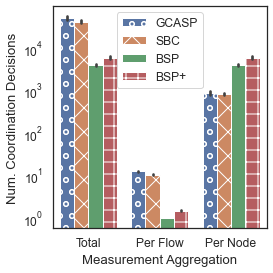

In [7]:
# plot num decisions
fig, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale=1.1, style='white')

bar = sns.barplot('agg', 'dec_count', hue='algorithm', hue_order=labels, data=df_all, ax=ax)
ax.set_xlabel('Measurement Aggregation')
ax.set_ylabel('Num. Coordination Decisions')
ax.set_yscale('log')

# add hatches to the bars for better readability in black & white
# repeat each hatch 3 times since each color ocurrs 3x
hatches = ['o', 'o', 'o', 'x', 'x', 'x', '', '', '', '+', '+', '+']
for i, thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])

# remove legend title
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
    
# save
plt.tight_layout()
network_name = network.replace('.graphml', '')
ing_str = ing.replace('.', '')
fig.savefig(f'plots/{network_name}_{config}_{ing_str}_decisions.pdf')

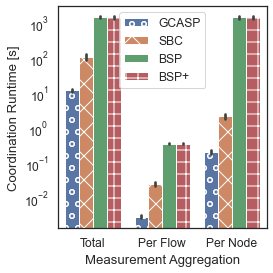

In [8]:
# plot runtimes
fig, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale=1.1, style='white')

bar = sns.barplot('agg', 'dec_time_avg', hue='algorithm', hue_order=labels, data=df_all, ax=ax)
ax.set_xlabel('Measurement Aggregation')
ax.set_ylabel('Coordination Runtime [s]')
ax.set_yscale('log')

# add hatches to the bars for better readability in black & white
# repeat each hatch 3 times since each color ocurrs 3x
hatches = ['o', 'o', 'o', 'x', 'x', 'x', '', '', '', '+', '+', '+']
for i, thisbar in enumerate(bar.patches):
    thisbar.set_hatch(hatches[i])

# remove legend title
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# save
plt.tight_layout()
network_name = network.replace('.graphml', '')
ing_str = ing.replace('.', '')
fig.savefig(f'plots/{network_name}_{config}_{ing_str}_runtime.pdf')

In [9]:
for agg in ['Total', 'Per Flow', 'Per Node']:
    for alg in ['GCASP', 'SBC']:
        df_flow = df_all[df_all['agg'] == agg]
        df_flow.head()
        
        time_bsp = df_flow[df_flow['algorithm'] == 'BSP']['dec_time_avg'].mean() 
        time_distr = df_flow[df_flow['algorithm'] == alg]['dec_time_avg'].mean()
        print(f"{agg}, {alg}: {time_bsp / time_distr} faster than BSP")


Total, GCASP: 119.55109132876352 faster than BSP
Total, SBC: 13.116000470586837 faster than BSP
Per Flow, GCASP: 121.82515069769593 faster than BSP
Per Flow, SBC: 13.805386353535209 faster than BSP
Per Node, GCASP: 6898.90330848095 faster than BSP
Per Node, SBC: 669.4307700389624 faster than BSP
